# vLife Virtusa
## Behavioral Assessment of Patient Health
### Usecase Description
_Solution to build a predictive model in order to asses patient health based on its behavioural assesment. Powered with Logistic Regression binary classification Model for predicting wheather individual is in Good or Poor health.Problem Statement we’ll solve is a binary classification task with the goal of predicting an individual’s health_.
### Data Source
- [Click Here for Data Source](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system)
- [Click Here to view BRFSS Handbook](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)

### Dataset Description
- This dataset was collected by the Centers for Disease Control and Prevention.
- Each year contains a few hundred columns. Please see one of the annual code books for complete details.
- CSV files were converted from a SAS data format using pandas; there may be some data artifacts as a result.





In [41]:
import numpy as np # linear algebra
import pandas as pd 

import datetime
import pickle
from time import strftime

from sklearn.metrics import accuracy_score,precision_score,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV,KFold,train_test_split,learning_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import seaborn as se
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier

In [2]:
df = pd.read_csv('../input/behavioral-risk-factor-surveillance-system/2015.csv')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [3]:
print('Shape of Dataset {}'.format(df.shape))

Shape of Dataset (441456, 330)


In [4]:
for col in df.columns: 
    print(col) 

_STATE
FMONTH
IDATE
IMONTH
IDAY
IYEAR
DISPCODE
SEQNO
_PSU
CTELENUM
PVTRESD1
COLGHOUS
STATERES
CELLFON3
LADULT
NUMADULT
NUMMEN
NUMWOMEN
CTELNUM1
CELLFON2
CADULT
PVTRESD2
CCLGHOUS
CSTATE
LANDLINE
HHADULT
GENHLTH
PHYSHLTH
MENTHLTH
POORHLTH
HLTHPLN1
PERSDOC2
MEDCOST
CHECKUP1
BPHIGH4
BPMEDS
BLOODCHO
CHOLCHK
TOLDHI2
CVDINFR4
CVDCRHD4
CVDSTRK3
ASTHMA3
ASTHNOW
CHCSCNCR
CHCOCNCR
CHCCOPD1
HAVARTH3
ADDEPEV2
CHCKIDNY
DIABETE3
DIABAGE2
SEX
MARITAL
EDUCA
RENTHOM1
NUMHHOL2
NUMPHON2
CPDEMO1
VETERAN3
EMPLOY1
CHILDREN
INCOME2
INTERNET
WEIGHT2
HEIGHT3
PREGNANT
QLACTLM2
USEEQUIP
BLIND
DECIDE
DIFFWALK
DIFFDRES
DIFFALON
SMOKE100
SMOKDAY2
STOPSMK2
LASTSMK2
USENOW3
ALCDAY5
AVEDRNK2
DRNK3GE5
MAXDRNKS
FRUITJU1
FRUIT1
FVBEANS
FVGREEN
FVORANG
VEGETAB1
EXERANY2
EXRACT11
EXEROFT1
EXERHMM1
EXRACT21
EXEROFT2
EXERHMM2
STRENGTH
LMTJOIN3
ARTHDIS2
ARTHSOCL
JOINPAIN
SEATBELT
FLUSHOT6
FLSHTMY2
IMFVPLAC
PNEUVAC3
HIVTST6
HIVTSTD3
WHRTST10
PDIABTST
PREDIAB1
INSULIN
BLDSUGAR
FEETCHK2
DOCTDIAB
CHKHEMO3
FEETCHK
EYEEXAM
DIABEYE
D

In [5]:
display(df.describe())

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


## Exploratory Data Analysis
### Data Preprocessing & Generating Target variable

- As per the Hand book **_RFHLTH** is our Target column denoting Adults with good or better health

In [6]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [7]:
df['_RFHLTH'].value_counts()
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})


In [8]:
df['_RFHLTH'].value_counts()
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()

In [9]:
df = df.rename(columns = {'_RFHLTH': 'Health'})
df['Health'] = df['Health'].astype('int')
df['Health'].value_counts()

1    358072
0     82137
Name: Health, dtype: int64

In [10]:
M = df[(df['Health'] == 0)]
B = df[(df['Health'] == 1)]
trace = go.Bar(x = (len(M), len(B)), y = ['0','1'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['blue','grey'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of Health variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [11]:
percent_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
percent_missing.head()

QLMENTL2    1.0000
QLSTRES2    1.0000
QLHLTH2     1.0000
PAINACT2    1.0000
COLGHOUS    0.9999
dtype: float64

In [12]:
null_feat = pd.DataFrame(len(df['SEQNO']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightblue',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

> **As per the BFSS Handbook there are 330 features in dataset filtering out features based on domain knowledge and kaggle kernals.**

In [13]:
filtered_df = df[['MENTHLTH','_AGEG5YR', 'SEX','EDUCA','EMPLOY1','INCOME2','_RACE','NUMADULT','MARITAL','VETERAN3','PREGNANT','ADPLEASR','ADDOWN','ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE','Health']]

In [14]:
filtered_df.head()

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
0,18.0,9.0,2.0,4.0,8.0,3.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,88.0,7.0,2.0,6.0,3.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,88.0,11.0,2.0,4.0,7.0,99.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,30.0,9.0,2.0,4.0,8.0,8.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,88.0,9.0,2.0,5.0,8.0,77.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
for column in filtered_df.columns.values:
    print(f" Unique values of {column} : {filtered_df[column].nunique()}")

 Unique values of MENTHLTH : 33
 Unique values of _AGEG5YR : 14
 Unique values of SEX : 2
 Unique values of EDUCA : 7
 Unique values of EMPLOY1 : 9
 Unique values of INCOME2 : 10
 Unique values of _RACE : 9
 Unique values of NUMADULT : 17
 Unique values of MARITAL : 7
 Unique values of VETERAN3 : 4
 Unique values of PREGNANT : 4
 Unique values of ADPLEASR : 17
 Unique values of ADDOWN : 17
 Unique values of ADSLEEP : 17
 Unique values of ADENERGY : 17
 Unique values of ADEAT1 : 17
 Unique values of ADFAIL : 17
 Unique values of ADTHINK : 17
 Unique values of ADMOVE : 17
 Unique values of Health : 2


In [16]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(filtered_df)

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
Total,0,0,0,0,0,3287,0,186419,0,6,375370,419833,419849,419858,419864,419875,419882,419896,419912,0
Percent,0,0,0,0,0,0.746691,0,42.3478,0,0.00136299,85.2709,95.3713,95.3749,95.377,95.3783,95.3808,95.3824,95.3856,95.3892,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [17]:
def impute_df(filtered_df):
    #Changing values from 77,88,7,8,9,14 to NAN | Also, changing 88 values to 0
    for x in ['ADPLEASR','ADDOWN','ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE']:
        filtered_df[x].replace(77, np.NaN, inplace= True)
        filtered_df[x].replace(99, np.NaN, inplace= True)
        filtered_df[x].replace(88, 0, inplace= True)


    for x in ['EDUCA','EMPLOY1','_RACE', 'MARITAL']:
        filtered_df[x].replace(9, np.NaN, inplace=True)

    for x in ['VETERAN3','PREGNANT']:
        filtered_df[x].replace(9, np.NaN, inplace= True)
        filtered_df[x].replace(7, np.NaN, inplace= True)

    filtered_df['_AGEG5YR'].replace(14, np.NaN, inplace= True)
    filtered_df['INCOME2'].replace(77, np.NaN, inplace= True)
    filtered_df['INCOME2'].replace(99, np.NaN, inplace= True)
    filtered_df['MENTHLTH'].replace(88, 0, inplace= True)
    
    return filtered_df


In [18]:
imputed_df = impute_df(filtered_df)

In [19]:
imputed_df.head()

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
0,18.0,9.0,2.0,4.0,8.0,3.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.0,7.0,2.0,6.0,3.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.0,11.0,2.0,4.0,7.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,30.0,9.0,2.0,4.0,8.0,8.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.0,9.0,2.0,5.0,8.0,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
imputed_df.isnull().sum()

MENTHLTH         0
_AGEG5YR      5270
SEX              0
EDUCA         1762
EMPLOY1       3720
INCOME2      79019
_RACE         7345
NUMADULT    186419
MARITAL       3041
VETERAN3       810
PREGNANT    375859
ADPLEASR    420531
ADDOWN      420091
ADSLEEP     420167
ADENERGY    420265
ADEAT1      420228
ADFAIL      420110
ADTHINK     420121
ADMOVE      420345
Health           0
dtype: int64

In [21]:
df_ = imputed_df.copy()

In [22]:
## Dropping NaN with no qestions answered for Motion features
clean_data = filtered_df.dropna(subset=['ADPLEASR','ADDOWN','ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE'],how='all')
print(clean_data.shape)

(20346, 20)


In [23]:
missing_data(clean_data)

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
Total,0,149,0,55,82,3550,176,7757,44,21,17635,668,228,304,402,365,247,258,482,0
Percent,0,0.732331,0,0.270323,0.403028,17.4481,0.865035,38.1254,0.216259,0.103214,86.6755,3.2832,1.12061,1.49415,1.97582,1.79396,1.214,1.26806,2.36902,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [24]:
def napreg(x):
    if x['SEX'] == 1 or (x['_AGEG5YR'] >= 6 and x['_AGEG5YR'] <= 13):
        return 2
    else:
        return x['PREGNANT']

clean_data['PREGNANT'] = df.apply(napreg, axis=1)

In [25]:
cleaned_df = clean_data.dropna(subset=['_AGEG5YR', 'SEX','EDUCA','EMPLOY1','INCOME2','_RACE','NUMADULT','MARITAL','VETERAN3','PREGNANT'])
print(cleaned_df.shape)

(10066, 20)


In [26]:
cleaned_df = cleaned_df.dropna(subset=['ADPLEASR','ADDOWN','ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE'],how='all')
cleaned_df = cleaned_df.reset_index(drop=True)
print(cleaned_df.shape)

(10066, 20)


In [27]:
missing_data(cleaned_df)

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
Total,0,0,0,0,0,0,0,0,0,0,0,293,90,122,166,158,91,78,189,0
Percent,0,0,0,0,0,0,0,0,0,0,0,2.91079,0.894099,1.212,1.64912,1.56964,0.904033,0.774886,1.87761,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [28]:
train_data = cleaned_df.dropna().reset_index(drop=True)
print(train_data.head(5))
train_data.columns

   MENTHLTH  _AGEG5YR  SEX  EDUCA  EMPLOY1  INCOME2  _RACE  NUMADULT  MARITAL  \
0       0.0      10.0  2.0    6.0      7.0      8.0    2.0       1.0      3.0   
1       0.0       5.0  2.0    6.0      1.0      7.0    1.0       2.0      1.0   
2       0.0       9.0  2.0    6.0      7.0      8.0    1.0       2.0      1.0   
3       0.0      13.0  1.0    6.0      7.0      7.0    1.0       1.0      3.0   
4       0.0      11.0  1.0    4.0      2.0      4.0    1.0       1.0      1.0   

   VETERAN3  PREGNANT  ADPLEASR  ADDOWN  ADSLEEP  ADENERGY  ADEAT1  ADFAIL  \
0       2.0       2.0       2.0     0.0      0.0       0.0     0.0     0.0   
1       2.0       2.0       0.0     0.0      7.0       0.0     0.0     0.0   
2       2.0       2.0       0.0     0.0      0.0       0.0     0.0     0.0   
3       1.0       2.0       0.0     0.0      0.0       1.0     1.0     0.0   
4       2.0       2.0       0.0     0.0      0.0       0.0     1.0     0.0   

   ADTHINK  ADMOVE  Health  
0      0.0     

Index(['MENTHLTH', '_AGEG5YR', 'SEX', 'EDUCA', 'EMPLOY1', 'INCOME2', '_RACE',
       'NUMADULT', 'MARITAL', 'VETERAN3', 'PREGNANT', 'ADPLEASR', 'ADDOWN',
       'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE',
       'Health'],
      dtype='object')

In [29]:
train_data

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
0,0.0,10.0,2.0,6.0,7.0,8.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,5.0,2.0,6.0,1.0,7.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,1
2,0.0,9.0,2.0,6.0,7.0,8.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,13.0,1.0,6.0,7.0,7.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
4,0.0,11.0,1.0,4.0,2.0,4.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9219,0.0,13.0,1.0,4.0,7.0,5.0,1.0,2.0,1.0,1.0,2.0,0.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,0
9220,0.0,7.0,2.0,5.0,1.0,8.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,4.0,0.0,14.0,0.0,1
9221,2.0,8.0,2.0,6.0,1.0,8.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9222,0.0,10.0,1.0,3.0,7.0,5.0,1.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [30]:
missing_data(train_data)

,MENTHLTH,_AGEG5YR,SEX,EDUCA,EMPLOY1,INCOME2,_RACE,NUMADULT,MARITAL,VETERAN3,PREGNANT,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,Health
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [31]:
X = train_data.drop('Health',1)
y = train_data.Health

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Predictive Models
### Model Selection

In [32]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, 
                                                                       n_estimators=600))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))


clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreeClassifier())])))

scoring = 'accuracy'
n_folds = 10
msgs = []
results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    msgs.append(msg)
    print(msg)
    

LogReg: 0.819579 (+/- 0.015132)
XGBClassifier: 0.822977 (+/- 0.014147)
KNN: 0.788673 (+/- 0.016361)
DecisionTreeClassifier: 0.738188 (+/- 0.015483)
RandomForestClassifier: 0.792233 (+/- 0.016457)
GradientBoostingClassifier: 0.810841 (+/- 0.015307)
RidgeClassifier: 0.813916 (+/- 0.018464)
ExtraTreesClassifier: 0.733172 (+/- 0.022694)


> _Logistic Regression Outperforms others ML Models_.

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training accuracy : 0.8213592233009709
Testing accuarcy : 0.8222733245729303
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       734
           1       0.84      0.94      0.89      2310

    accuracy                           0.82      3044
   macro avg       0.78      0.69      0.72      3044
weighted avg       0.81      0.82      0.81      3044



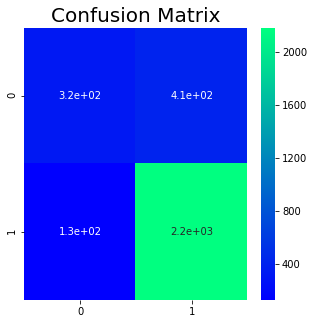

In [34]:
# creating a model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train_scaled, y_train)

# predicting the test set results
y_pred = model.predict(X_test_scaled)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train_scaled, y_train))
print("Testing accuarcy :", model.score(X_test_scaled, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
se.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [35]:
log_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(x_train_scaled, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 0.01, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.3s finished


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [37]:
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [38]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [39]:
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = 42)


CV_log2_clf.fit(x_train_scaled, y_train)

y_pred = CV_log2_clf.predict(X_test_scaled)
y_score = CV_log2_clf.decision_function(X_test_scaled)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

In [42]:
# save the model to disk
filename = 'pickled_model.pkl'
pickle.dump(CV_log2_clf, open(filename, 'wb'))
  
# load the model from disk
pickle_model = pickle.load(open(filename, 'rb'))
print(pickle_model)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [43]:
show_metrics()

Accuracy  =     0.822
Precision =     0.842
Recall    =     0.942
F1_score  =     0.889


In [44]:
cross_val_metrics(CV_log2_clf)

[accuracy] : 0.82047 (+/- 0.00882)
[precision] : 0.84080 (+/- 0.01317)
[recall] : 0.94244 (+/- 0.01781)


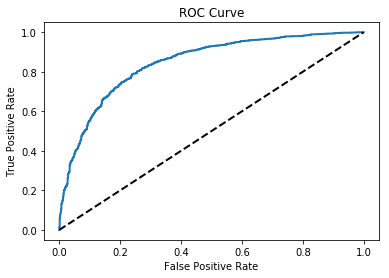

In [45]:
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

### Deep learning Model with Keras

In [46]:
model = Sequential()
model.add(Dense(64,input_dim = 19,activation='relu'))
model.add(Dense(32,activation='relu',init = 'uniform'))
model.add(Dense(16,activation='relu',init = 'uniform'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1280      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit(x_train_scaled,y_train ,epochs=100,batch_size=128, validation_data=(X_test_scaled,y_test))

Train on 6180 samples, validate on 3044 samples
Epoch 1/100
6180/6180 [==============================] - 1s 83us/step - loss: 0.5819 - accuracy: 0.7652 - val_loss: 0.4123 - val_accuracy: 0.8098
Epoch 2/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.4193 - accuracy: 0.8136 - val_loss: 0.3987 - val_accuracy: 0.8164
Epoch 3/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.4106 - accuracy: 0.8217 - val_loss: 0.3992 - val_accuracy: 0.8187
Epoch 4/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.4077 - accuracy: 0.8222 - val_loss: 0.3989 - val_accuracy: 0.8183
Epoch 5/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.4055 - accuracy: 0.8225 - val_loss: 0.3970 - val_accuracy: 0.8167
Epoch 6/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.4036 - accuracy: 0.8246 - val_loss: 0.3965 - val_accuracy: 0.8177
Epoch 7/100
6180/6180 [==============================] - 0s 20us/step - loss

6180/6180 [==============================] - 0s 20us/step - loss: 0.3229 - accuracy: 0.8633 - val_loss: 0.4580 - val_accuracy: 0.8127
Epoch 57/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.3208 - accuracy: 0.8634 - val_loss: 0.4610 - val_accuracy: 0.8118
Epoch 58/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.3199 - accuracy: 0.8688 - val_loss: 0.4673 - val_accuracy: 0.8095
Epoch 59/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.3167 - accuracy: 0.8655 - val_loss: 0.4648 - val_accuracy: 0.8134
Epoch 60/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.3138 - accuracy: 0.8663 - val_loss: 0.4711 - val_accuracy: 0.8104
Epoch 61/100
6180/6180 [==============================] - 0s 21us/step - loss: 0.3115 - accuracy: 0.8704 - val_loss: 0.4779 - val_accuracy: 0.8104
Epoch 62/100
6180/6180 [==============================] - 0s 20us/step - loss: 0.3115 - accuracy: 0.8689 - val_loss: 0.4799 - val_a

In [ ]:
_, accuracy = model.evaluate(x_train_scaled, y_train)
__, Accuracy = model.evaluate(X_test_scaled, y_test)

print('Accuracy Test: %.2f' % (accuracy*100))
print('accuracy Train: %.2f' % (Accuracy*100))

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## END